# Table of Contents

- [Early Stopping](#early-stopping)
- [Weight decay](#weight-decay)
- [Data augmentation](#augment)
- [Dropout](#dropout)
- [BatchNorm](#batchnorm)
- [Exercises](#exercises)


# Housekeeping

- Some references for today
  - [Official pytorch tutorials](https://pytorch.org/tutorials/)
  - [Pytorch tutorials by yunjey, from beginning to advanced](https://github.com/yunjey/pytorch-tutorial)
  - [Deep Learning Book on ConvNets](https://www.deeplearningbook.org/contents/convnets.html)
  - [Deep learning book on Regularization](https://www.deeplearningbook.org/contents/regularization.html)
- Today's url 
  - https://git.io/ml2021-07
- Email if you need help with any of this!

# Generalization Revisited

- Lets remind ourselves of the point of machine learning:
  - We want to build a model to solve a classification or regression problem
    - Classification: given a datapoint, which (of several given)
      category does this datapoint belong to, e.g. dog or cat,
      electron or proton, galaxy or star
    - Regression: given a datapoint, what value(s) of some (hidden)
      input variable(s) produced this datapoint, e.g. energy of photon
      given calorimeter measurement; age of person in a given photo;
      value of a house given info on location, size, etc.
  - The model has some parameters which we can optimize (it represents
    a continuum of potential models) 
  - We have some labelled examples
  - We use the labelled examples as input to train the parameters of
    the model
  - Ultimately, we want the model to work on unlabelled examples
- The last point can be said: we want the model to *generalize*

# Regularization

- We previously looked at training, and the idea of splitting the data to
  - Training set: a set of labelled datapoints which are used as
    inputs to optimization process
  - Testing set: a (separate!) set of labelled datapoints which are
    used to understand how well the model generalizes
- A loss function is optimized, and the properties on the training and
  testing set are used to check that we're not /overtraining/ the
  model (optimizing on non-generalizable features of the training set)
- *Regularization* is any strategy which is designed to reduce the
  testing set error, usually at the expense of the training set error
- In another way: regularization techniques are used to avoid
  overtraining the model and to increase the generalizablity of the
  model
- This can include altering the training inputs in some way, altering
  parts of the model between training runs, or including some kind of
  penalties to prevent model parameters from diverging in size or to
  encode prior knowledge
- We will look at a few common strategies today

# Early stopping <a id="early-stopping" />

- Our first regularization strategy is one we already saw *early stopping*
- In large complex models, its almost certain the model capacity is too large
- So, we train, keep track of testing loss, and use the model
  parameters that gives the minimum of the training set
- Requires saving the parameters for each point
- Effectively an efficient hyperparameter optimization technique
- Commonly used as an inexpensive, almost no setup technique in
  conjunction with the other methods we'll discuss

# L2 regularization or "weight decay" <a id="weight-decay" />

- This is a classic machine learning technique, where its also called "ridge regression"
- The idea is to keep the weights close to the origin (close to 0) by adding a penalty to the loss function
- Given a loss function $J(w;X,y)$ for weights $w$ data represented by a matrix $X$ with known outputs $y$:
  - Use the total loss function $J^*(w;X,y) = \frac{\alpha}{2} |w|^2 + J(w;X,y)$
  - Then, the gradient is: $\nabla_w J^*(w;X,y) = \alpha w + \nabla_w J(w;X,y)$
  - So a single gradient step to update the weights with learning rate
    $\lambda$ looks like: $w \leftarrow w - \lambda(\alpha |w| + \nabla_w
    J(w;X,y))$
  - Or: $w \leftarrow (1 - \lambda\alpha) |w| - \lambda \nabla_w J(w;X,y)$
- So, the effect is to reduce the size of the weight by some small
  fraction $\alpha\lambda$ every step, as well as stepping in the gradient direction
- Thus, this technique for keeping the weights small is known as weight decay

# More on weight decay

- Weight helps to control model complexity by effectively reducing the
  allowable search space for the weights
  - Large values for the weights will be driven to small values, thus
    disallowed
- You can relate the weight decay to controlling which eigenvalues of
  the Hessian make an impact in the parameter search, small
  eigenvalues which have little impact on the gradient will be
  effectively remove (another name for this is Tikhinov regularization
  which will be familiar if you know about it from unfolding)
- In pytorch, weight decay can be turned on in the optimizer by
  setting `weight_decay` to the chosen $\alpha$
- The necessary `weight_decay` will depend on the model and the data,
  one typically needs to try several orders of magnitude to determine
  the best parameter (or if it helps, this is a *hyperparameter tuning*)

optim = torch.optim.SGD(..., weight_decay=0.01)

- See the [Deep Learning book section 7.1](https://www.deeplearningbook.org/contents/regularization.html) for more on the math


# Data Augmentation <a id="augment" />

- Data augmentation is taking the existing data and creating a larger effective dataset by creating new datapoints from the old data, using the same labels
- So, e.g. we could flip an image: we want the flipped image to be given the same label as the non-flipped image, so the network needs to be robust against flips
- The overall idea is that if the network isn't given the exact same image, it becomes harder for the network to memorize, so augmentation is encouraging the network to learn to generalize
- Other common *transformations* include:
  - Horizontal or vertical flipping
  - Image Rotation
  - Random erasing (randomly zero out part of the image, i.e. set some part of the image to black, the size you black out can also vary within bounds you give)
  - Color jitter (turn up the brightness or contrast)
- In pytorch, you could add this in as part of the data loader, and image augmentations live in `torchvision.transforms`
  - Generally, the transformations take at least one parameter, which is the *probability* that a transformation will be applied
  - Each batch through the data will therefore use different transformations, so the network doesn't see the exact same images each batch
  
More transforms and help: [pytorch transforms docs](https://pytorch.org/vision/stable/transforms.html)


Extracting /data/torchvision/FashionMNIST/raw/train-images-idx3-ubyte.gz to /data/torchvision/FashionMNIST/raw




Extracting /data/torchvision/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /data/torchvision/FashionMNIST/raw




Extracting /data/torchvision/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /data/torchvision/FashionMNIST/raw




Extracting /data/torchvision/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /data/torchvision/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


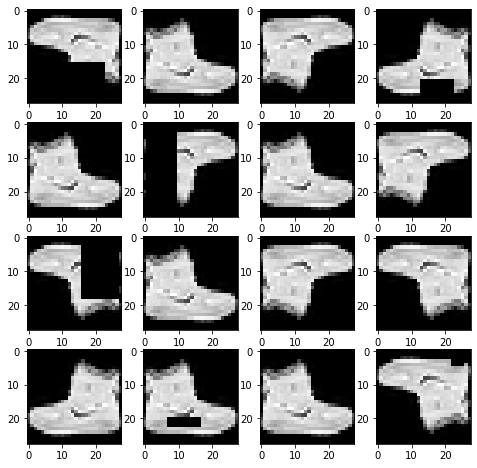

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, RandomHorizontalFlip, RandomVerticalFlip, RandomErasing
import matplotlib.pyplot as plt

training = Compose([ToTensor(), RandomVerticalFlip(0.5), RandomHorizontalFlip(0.5), RandomErasing(0.5)])
training_data = datasets.FashionMNIST(
    root="/data/torchvision",
    train=True,
    download=True,
    transform=training
)

test_data = datasets.FashionMNIST(
    root="/data/torchvision",
    train=False,
    download=True,
    transform=ToTensor()
)

plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    # every time we load the data, different transformations are applied at random
    # they should all be labelled the same however
    plt.imshow(training_data[0][0].view(28,28), cmap='gray')

# Dropout <a id="dropout" />

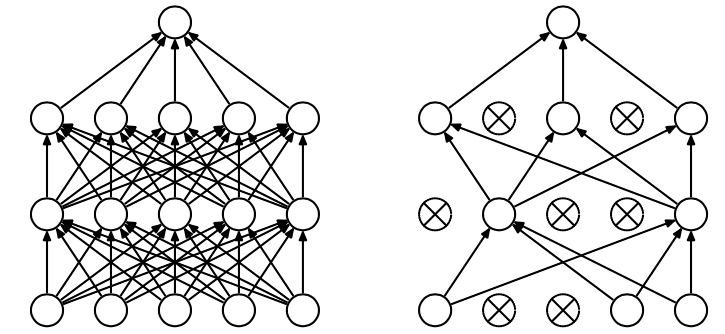

In [ ]:
from IPython.display import Image
Image('dropout.png')

- *Dropout* is a simple but powerful idea: while training, randomly
  set the outputs of some nodes to 0
  - Effectively, this removes them from the model
  - Forces the model to look for robust features: the features used in
    optimizing an individual datapoint will be different every epoch
- We can think of dropout as creating an ensemble of models which
  share parameters, and randomly selecting the exact model each
  training step, the same model will never see a datapoint twice
- This ensemble idea can be related to *boosting* techniques, see the
  Deep Learning Book for details

See also: [Andrew Ng's Dropout lecture](https://www.youtube.com/watch?v=ARq74QuavAo)

# Dropout in Pytorch

- Dropout is easily applied in pytorch, just add a `torch.nn.Dropout`
- It takes one hyperparameter: the fraction of nodes to be set to zero
- Here now we see the importance of `train()` and `eval()`, during
  training, `Dropout` should be working, but when we are applying the
  network, we want the full power of the network, so we turn Dropout off
- It also increases the output of the remaining nodes to compensate
  for the lowering of the inputs of the remaining portions of the network
- I.e. we don't want to set nodes to 0 randomly when using the network!

In [ ]:
import torch
dropout = torch.nn.Dropout(0.5) # Creates the layer
x = torch.randn((6))
print("Initial:", x)
print("Dropout:", dropout(x)) # Use the layer
print("Dropout:", dropout(x))

Initial: tensor([-1.1555,  0.7166,  0.3103, -0.1631,  0.8782,  0.2867])
Dropout: tensor([-0.0000, 1.4332, 0.6207, -0.0000, 0.0000, 0.0000])
Dropout: tensor([-2.3110,  1.4332,  0.6207, -0.0000,  1.7563,  0.0000])


# Dropout Pros and Cons

- The good: easy to understand, easy to implement, very fast, very
  good for avoiding overtraining
- The bad: the loss function is no longer well-defined: you're
  actually comparing different models with every iteration, not
  obvious that combining these random models together
- Care needs to be taken interpreting plots of loss versus training
  time, in particular, training loss should be bigger than testing
  loss, can no longer use training-testing loss as an absolute test of
  overtraining

# BatchNorm <a id="batchnorm" />

- In general, its better to have outputs of similar size flowing
  through the network, generally we normalize input data between 0 and 1
- The idea is, as we train deep networks, changes in the upper layers
  means the bottom layers will see very different values, and so
  updating upper and lower layers at the same time can be an issue
  - The change in the upper layer may act in reverse to the change in
    the lower layer, cancelling out the training, or increasing the values too far
  - And in particular, changes in the upper layer will affect all layers below, giving a cascading effect of changes which makes setting the upper layers correctly very difficult in deep networks
- In batch normalization, we try to stop these effects happening by
  forcing the output of a node to follow a Gaussian
- In training, we replace the output of a layer $\mathbf{H}$ of a minibatch with
  - $\mathbf{H'} = (\mathbf{H} - \mu) / \sigma$ where $\mu=\frac{1}{m}\sum_i H_i$, $\sigma = \sqrt{\epsilon + \frac{1}{m}\sum_i (H_i - \mu)^2}$
  - That is, we normalize the batch to follow a unit normal distribution
  - Note that $\mu$ and $\sigma$ will change every batch (!)
  - The normalization is done per channel (that is, the sum to find $\mu$ and $\sigma$ and reweight is done by summing over the NxHxW block for each channel where the batch has size NxCxHxW at the layer we are normalizing)
- We can also replace H by $\gamma \mathbf{H'} + \beta$, where
  $\gamma$ and $\beta$ will be optimized during training (pytorch does this)
  - This gives the same properties as our unit normal, but can
    have some training dynamics since we pass the output
    to a non-linear activation
- We effectively checkpoint a layer to known statistics each batch, so we don't need to worry so much about the cascading effects from the training of the layers above

Andrew Ng on BatchNorm:
- [Part 1](https://www.youtube.com/watch?v=tNIpEZLv_eg)
- [Part 2](https://www.youtube.com/watch?v=em6dfRxYkYU)
- [Part 3 (why does BatchNorm work)](https://www.youtube.com/watch?v=nUUqwaxLnWs)
- [Part 4 (BatchNorm @ test time)](https://www.youtube.com/watch?v=5qefnAek8OA)

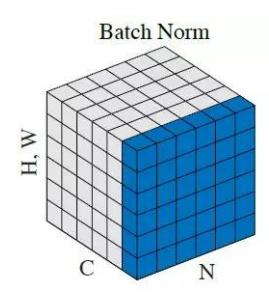

In [ ]:
Image('batch-norm.png')

# BatchNorm continued

- When we use the network (or check properties in the testing phase),
  we don't want to recalculate $\mu$ and $\sigma$ like we did in training
  - This would make the output non-deterministic, every time we change
    the batch a given datapoint is in, it would change the output
  - Or maybe we have no batches, and just process data one by one
- Instead, during training we keep a weighted average of $\mu$ and
  $\sigma$ (decaying so that old values when different weights were used
  can be discarded) and apply those averaged $\mu$ and $\sigma$ during testing
- So, we avoid tying our parameter activations in lower levels to the
  exact output values in the upper levels, which is good for training,
  but we also arrange to keep a set of values which we can later apply to
  testing
- BatchNorm is almost always used today because it speeds up training
  immensely, it is still a matter of debate as to why it works so well though!
  - The initial idea outlined above that BatchNorm solves the
    "internal covariate shift" problem has been disputed
  - Its not disputed that BatchNorm improves training though!

# BatchNorm in PyTorch

- For batch normalizing a convolutional layer, use `BatchNorm2d`, it
  takes in 1 parameter which is the number of output channels

In [ ]:
class BatchNet(torch.nn.Module):
  def __init__(self):
    ...
    self.c2 = torch.nn.Conv2d(16,32,3) # outputs 32 3x3 filters
    # input parameter should equal the output channels
    self.bn2 = torch.nn.BatchNorm2d(32)
    ...
  def forward(self, x):
    ...
    # can try applying before or after the activation
    x=self.bn2(torch.relu(self.c2(x)))
    ...

# Exercises <a id="exercises" />


- There are many, many, many techniques that people have invented for
  regularization. We've only covered a fraction. There's no magic
  bullet, you have to try a few methods with your data to figure out
  what will work best.
- We will train a few convolutional networks in pytorch trying out some
  of the techniques we learned today. Don't forget to switch between
  `train` and `eval`!

0. Load the CIFAR100 into a dataloader ready to be used for
PyTorch. Check the last lecture exercises if you need a reminder.

In [2]:
import torch as th
import torchvision as tv
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

device = 'cuda'
trans = tv.transforms.ToTensor()
train = tv.datasets.CIFAR100('/data/torchvision', train=True, download=True, transform=trans)
test = tv.datasets.CIFAR100('/data/torchvision', train=False, download=True, transform=trans)

trainloader = th.utils.data.DataLoader(train, batch_size=64)
testloader = th.utils.data.DataLoader(test, batch_size=64)

import torch.nn as nn
import torch.nn.functional as F


Extracting /data/torchvision/cifar-100-python.tar.gz to /data/torchvision
Files already downloaded and verified


1. Create and train a CNN on the CIFAR100, for this first training,
don't use any of the regularization techniques. Make the model as
simple or complex as you like, but use at least three convolution
layers and one fully connected hidden layer. Try to make it big enough
to be possible to overtrain, but small enough to run in a reasonable
time. Keep track of the training and testing loss per epoch.

In [3]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)



import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(5): 
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 782 == 781:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 782))
            running_loss = 0.0

print('Finished Training')



[1,   782] loss: 4.607
[2,   782] loss: 4.605
[3,   782] loss: 4.602
[4,   782] loss: 4.590
[5,   782] loss: 4.477
Finished Training


2. Create a new instance of your model and retrain with weight_decay set
to a non-zero value. Does the training speed change? Does the final
testing loss change (include early stopping)? (To answer these
questions make a plot of training and testing with and without
weight_decay, be sure to plot the curves on the same plot to compare
easily, and include a legend and labels)

[1,   782] loss: 4.279
[2,   782] loss: 4.279
[3,   782] loss: 4.279
[4,   782] loss: 4.279
[5,   782] loss: 4.279
Finished Training


ValueError: ignored

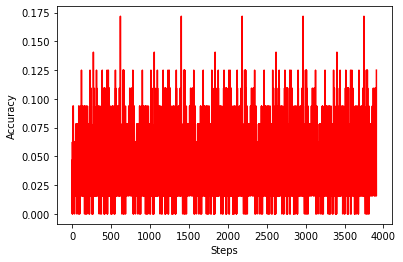

In [9]:

net2 = Net()
net2.to(device)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)
#weight decay 바꿔도 한계가 있는가. 


train_acc = []
test_acc = []
total_steps = 3910


for epoch in range(5): 
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 782 == 781:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 782))
            running_loss = 0.0

        # for accuracy(train)
        _, indices = outputs.max(dim=1)
        accuracy = (indices == labels).int().sum() / len(indices)
        train_acc.append(accuracy)
        
        total_steps += 1
    
    with th.no_grad():
        for i, data in enumerate(testloader):
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            _, indices = outputs.max(dim=1)
            accuracy = (indices == labels).int().sum() / len(indices)
            test_acc.append(accuracy)



print('Finished Training')





# Plot learning curve (accuracy)
steps1 = np.arange(total_steps)

train_acc = th.stack(train_acc).detach().cpu().numpy()
test_acc = th.stack(test_acc).detach().cpu().numpy()

plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.plot(steps, train_acc, 'r', label='train')
plt.plot(steps, test_acc, 'b', label='test')
plt.title('Learning curve')
plt.legend(loc='upper right')
plt.show()  

    # # test accuracy (total)
    # with th.no_grad():
    #   net.eval()
    #   total_sum = 0
    #   total_len = 0
    #   for data, target in testloader:
    #     opt.zero_grad()
    #     output = net(data)
    #     _, indices = output.max(dim=1)
    #     total_sum += (indices == target).int().sum()
    #     total_len += len(indices)
    #   print('test accuracy(total): %.3f' % (total_sum/total_len))
      


3. Add dropout layers into your network after the convolutional
layers. How does the training and testing speed compare? How about the
overall result? (compare as for the previous questions) You may need to 
adjust the learning rate to get the best performance.

4. Finally try adding BatchNorm2d layers between the convolutions and
   the relu's (instead of Dropout, BatchNorm and Dropout typically
   don't play nice together). How does the training and testing speed
   compare? How about the overall result? (compare as for the previous
   questions) [You might also want to reload the dataset with some data augmentations to stop the network quickly overtraining!]

Were any of these techniques particularly helpful for your network?